In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print('length of X_train:',len(X_train))
print('length of X_test:',len(X_test))

length of X_train: 60000
length of X_test: 10000


Label: 5


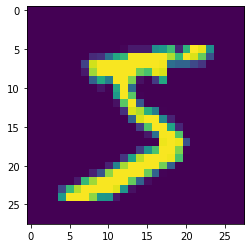

In [6]:
plt.imshow(X_train[0])
print('Label:',y_train[0])

In [9]:
print('min value:',X_train[0].min())
print('max value:',X_train[0].max())

min value: 0
max value: 255


In [10]:
# normalize
X_train = X_train / 255
X_test = X_test / 255

print('min value:',X_train[0].min())
print('max value:',X_train[0].max())

min value: 0.0
max value: 1.0


In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

## neural network with no hidden layers

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6990 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2865 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9281
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2508 - accuracy: 0.9304: 0s - loss: 0.2
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/st

In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9257


[0.2672577500343323, 0.9257000088691711]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([4.1022599e-03, 1.4053226e-08, 1.6237289e-02, 9.7383994e-01,
       2.2110343e-03, 1.9468337e-01, 5.0303314e-08, 9.9990153e-01,
       8.4120840e-02, 6.3369524e-01], dtype=float32)

Predicted Label: 2


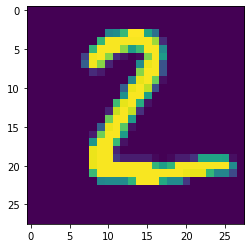

In [18]:
plt.imshow(X_test[1])
print('Predicted Label:',np.argmax(y_predicted[1]))

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [20]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    6,    8,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    5,    2,   13,    0],
       [   5,    8,  922,   15,    8,    4,   15,   14,   39,    2],
       [   5,    0,   16,  919,    0,   24,    5,   11,   23,    7],
       [   1,    1,    3,    2,  916,    0,   15,    6,    8,   30],
       [  11,    2,    1,   30,    9,  779,   19,    8,   29,    4],
       [  11,    3,    5,    1,    7,    8,  921,    1,    1,    0],
       [   1,    6,   20,    5,    8,    1,    0,  960,    3,   24],
       [   9,    6,    6,   20,    8,   25,   13,   15,  868,    4],
       [  11,    7,    1,    9,   30,    7,    0,   34,    7,  903]])>

Text(69.0, 0.5, 'Truth')

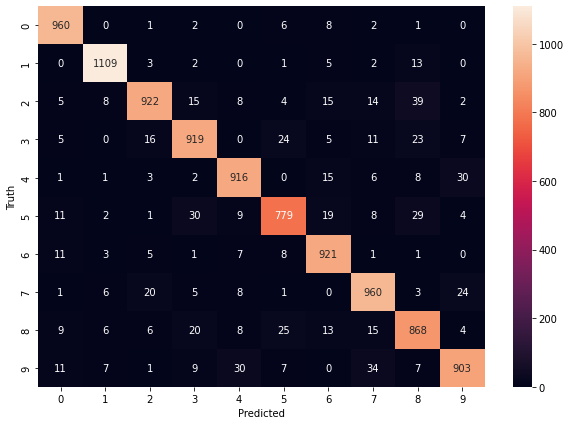

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4521 - accuracy: 0.8713
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0633 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9852: 1s - loss: 0.0472 -  -
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0311 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0251 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 5

In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9752


[0.08700381964445114, 0.9751999974250793]

Predicted Label: 9


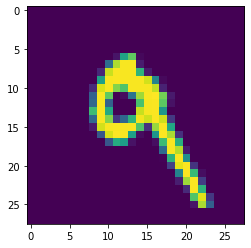

In [25]:
plt.imshow(X_test[7])
print('Predicted Label:',np.argmax(y_predicted[7]))

Text(69.0, 0.5, 'Truth')

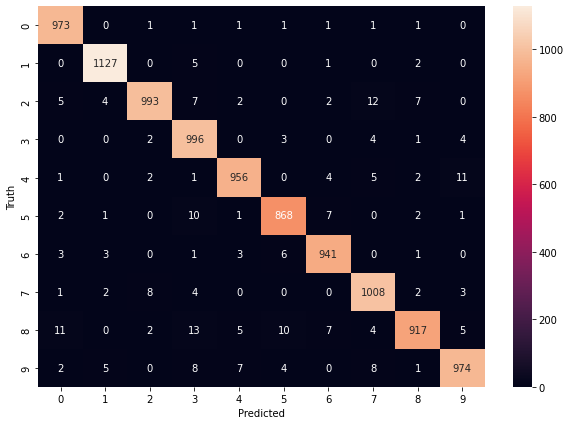

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer,so that we do not have to reshape

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4469 - accuracy: 0.8703
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1358 - accuracy: 0.9607
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0519 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9908: 0s - loss: 0.0317 - 
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0246 - accuracy: 0.9930: 0s - loss: 0.0245 - accuracy
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 10/10
1875/1875 [=======

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9763


[0.08456211537122726, 0.9763000011444092]